<img src="https://pages.cnpem.br/workshopbioimagens/wp-content/uploads/sites/166/2023/06/logo-ilum-2048x382.png" alt="Descrição da imagem" style="width: 1000px; height: auto; ">

<div style=" padding: 10px; font-size: 45px; text-align: center;">
<strong> A senha de tamanho variável 🕵️‍♀️: </strong> 
<div style=" padding: 10px; font-size: 34px; text-align: center;">
<strong>Encontrando a senha com algoritmo genético</strong> 

<div style=" padding: 10px; font-size: 17px; text-align: center;">
<strong>Autores:</strong> Júlia Guedes A. dos Santos & Maria Emily Nayla Gomes da Silva 
<div style=" padding: 10px; font-size: 17px; text-align: center;">
<strong>Professor:</strong> Daniel R. Cassar

<div style="background-color: lightblue; font-size: 18px; padding: 10px;">
<div style="text-align: justify"><strong>Objetivo:</strong> Resolver o problema da senha de forma que você não forneça a informação do tamanho da senha para a função que gera a população. Considere que a senha pode ser uma string de 1 até 30 caracteres. </div>

## 📝 **Introdução**  

<p style="text-align:justify";>
Algoritmos genéticos são técnicas de busca e otimização inspiradas nos princípios da evolução natural propostos por Darwin. Eles simulam processos biológicos como seleção, cruzamento e mutação para explorar soluções potenciais em espaços complexos de busca. Por meio dessa analogia com a biologia evolutiva, podemos definir os principais componentes de um algoritmo genético da seguinte forma:
</p>

* Genótipo: Conjunto de parâmetros que representam uma possível solução para o problema em questão;

* Gene: Elemento individual do genótipo, correspondendo a uma característica específica da solução;

* Indivíduo: Candidato a solução do problema, definido por um genótipo específico.

* População: Conjunto de indivíduos que compõem a base de busca do algoritmo. Essa população é submetida à seleção, de modo que os melhores indivíduos são escolhidos para formar as próximas gerações, promovendo a evolução das soluções ao longo do tempo.

<p style="text-align:justify";>
A partir dessa estrutura, é possível aplicar algoritmos genéticos na resolução de diversos problemas. Um exemplo didático clássico é o <strong>problema da senha</strong>, no qual o objetivo do algoritmo é descobrir uma senha – uma sequência de caracteres alfanuméricos previamente definida pelo usuário. A cada geração, os indivíduos são avaliados com base em sua semelhança com a senha correta. Esse problema é tratado como uma tarefa de minimização, em que se busca a menor distância entre a solução candidata e a senha original. Embora simplificado em comparação à quebra de senhas reais – que não contam com uma referência conhecida –, esse exemplo é útil para introduzir conceitos e também pode ter aplicações em áreas como biologia, por exemplo, na comparação de sequências de nucleotídeos.
</p>

<p style="text-align:justify";>
Neste contexto, o presente notebook tem como objetivo estender o problema clássico da senha, abordado nas aulas da disciplina de Redes Neurais e Algoritmos Genéticos, para o chamado <strong>problema da senha variável</strong>. A principal diferença está no fato de que o tamanho da senha é inicialmente desconhecido, o que exige que tanto a população inicial quanto os candidatos gerados ao longo do processo possam possuir diferentes comprimentos. Neste caso, consideraremos senhas com tamanho variando entre 1 e 30 caracteres.
</p>

<p style="text-align:justify";>
Para resolver esse novo desafio, será necessário adaptar a função objetivo – para que ela penalize adequadamente as diferenças de tamanho entre o candidato e a senha original – e também a função de criação da população, permitindo a geração de indivíduos com tamanhos variados desde o início da busca. Para avaliar a performance do algoritmo, esse será inicializado 1000 vezes, a fim de que seja possível notar, através do plot de um histograma, a quantidade de gerações necessárias para que o algoritmo encontre a senha original.
</p>



## 📚 **Importação de bibliotecas & funções** 

Para a resolução do problema, serão utilizadas as bibliotecas Random - para a implementação do algoritmo - e string - para a que o espaço de busca (caracteres possíveis para a definição da senha) possa ser definido. Além disso, funções relativas a implementação do algoritmo, como população, objetivo, seleção, cruzamento e mutação serão importadas do script "funcoes.sv".

In [1]:
import random
from string import ascii_lowercase, ascii_uppercase, digits

from funcoes_sv import populacao_senha as cria_populacao
from funcoes_sv import funcao_objetivo_pop_senha_sv as funcao_objetivo
from funcoes_sv import selecao_torneio_min as funcao_selecao
from funcoes_sv import cruzamento_ponto_simples_senha_sv as funcao_cruzamento
from funcoes_sv import mutacao_salto as funcao_mutacao1
from funcoes_sv import mutacao_insercao_delecao as funcao_mutacao2

## 🔠 **Definição da senha e dos parâmetros** 

A senha "EsquinasCampinas2025" será utilizada como alvo no problema. Para o funcionamento do algoritmo genético, os seguintes parâmetros principais serão definidos:

* Tamanho da população: Cada geração será composta por 500 indivíduos;

* Taxa de cruzamento: Fixada em 0,7 (ou 70%), define a probabilidade de dois indivíduos — "pai" e "mãe" — serem cruzados para gerar novos indivíduos;

* Taxa de mutação: Estabelecida em 20%, valor relativamente alto devido ao amplo espaço de busca, representado pela variável CARACTERES_POSSIVEIS;

* Tamanho do torneio: Cada seleção por torneio considerará 5 indivíduos, dentre os quais o melhor será escolhido;

* Número máximo de gerações: O algoritmo terá até 200 gerações para tentar encontrar a senha correta;

* Número de testes: Serão realizados 1000 testes independentes, permitindo a análise estatística da distribuição do número de gerações necessárias para alcançar a solução.


In [2]:
SENHA = list("EsquinasCampinas2025")
CARACTERES_POSSIVEIS = ascii_lowercase + ascii_uppercase + digits

TAMANHO_POPULACAO = 500
CHANCE_DE_CRUZAMENTO = 0.7
CHANCE_DE_MUTACAO = 0.2
TAMANHO_TORNEIO = 5

GERACAO_SV = 200
QUANTIDADE_TESTE = 1000

## 🧬**Implementação do algoritmo genético** 

A partir da função "populacao_senha", chamada nesse notebook de "cria_populacao" será possível criar candidatos para o problema da senha de tamanhos variados. Como principal modificação em relação a função original, o tamanho da senha, ao invés de ser definido no argumento da função, é sorteado por meio da função "random.randint(1,30)", que sorteia um número inteiro dentro desse intervalo.

In [4]:
populacao = cria_populacao(TAMANHO_POPULACAO, CARACTERES_POSSIVEIS)

A função objetivo — originalmente nomeada como "funcao_objetivo_senha_sv" — foi modificada para refletir melhor a complexidade do problema. A avaliação do fitness passou a considerar não apenas a diferença entre os caracteres das senhas, mas também a discrepância em seus tamanhos.

Especificamente, foi implementada uma penalização adicional proporcional ao produto entre a diferença absoluta de tamanho entre a senha correta e o candidato, e o número total de caracteres possíveis. Essa penalidade garante que indivíduos com tamanhos muito diferentes da senha-alvo tenham menor aptidão, incentivando o algoritmo a convergir não apenas para os caracteres corretos, mas também para o comprimento adequado da senha.

Em relação aos operadores evolutivos, serão utilizados os seguintes métodos:

* Seleção por torneio: Uma quantidade $n$ de indivíduos é sorteada e os $k$ mais aptos (nesse caso, com a menor função de fitness) são selecionados;

* Cruzamento de ponto duplo: Dois pontos ao longo do genótipo dos pais são selecionados, e os segmentos entre esses pontos são trocados para formar dois novos indivíduos;

* Mutação de salto: Um ou mais genes do indivíduo são substituídos aleatoriamente por novos caracteres do espaço de busca.

Além desses, será implementado um operador adicional: mutação por deleção ou inserção, inspirado em mecanismos biológicos reais. Assim como os demais operadores de mutação, essa operação só ocorre se um valor aleatório (gerado por random.random()) for inferior à taxa de mutação definida. Caso a mutação seja ativada, a função sorteia entre dois tipos de modificação:

* Inserção: Um ou mais genes são adicionados ao genótipo, respeitando o limite máximo de 30 genes por indivíduo;

* Deleção: Dois índices são sorteados, e todos os genes antes do menor e após o maior valor são removidos. Essa operação só é permitida para indivíduos que possuam mais de três genes;

Finalmente, a fim de armazenar os resultados para o cálculo da distribuição, a lista "quant_epocas" será definida, a qual armazenará a quantidade de épocas levadas pelo algoritmo para encontrar a senha original, caso essa seja menor do que o limite definido pela variavel GERACAO_SV. Caso contrário, será adicionado um a variavel "sem_convergencia", a qual é responsável por computar a quantidade de vezes que o algoritmo não foi capaz (pelo menos, dentro do intervalo que está sendo analisado) de encontrar a resposta correta.

In [5]:
quant_epocas = []
sem_convergencia = 0
 
for i in range(QUANTIDADE_TESTE):
    geracao = 0
    menor_fitness_geral = float("inf")
    populacao = cria_populacao(TAMANHO_POPULACAO, CARACTERES_POSSIVEIS)
   
 
    while geracao <= GERACAO_SV:
        fitness = funcao_objetivo(populacao, SENHA, CARACTERES_POSSIVEIS)
        menor_fitness_observado = min(fitness)
 
        if menor_fitness_observado == 0:
            indice = fitness.index(menor_fitness_observado)
            candidato = populacao[indice]
           
            # if geracao < 100:
            quant_epocas.append(geracao)
            break
 
        # Seleção
        selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
 
        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            filho1, filho2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.extend([filho1, filho2])
 
        # Mutação
        funcao_mutacao1(proxima_geracao, CHANCE_DE_MUTACAO, list(CARACTERES_POSSIVEIS))
        funcao_mutacao2(proxima_geracao, CHANCE_DE_MUTACAO, list(CARACTERES_POSSIVEIS))
 
        populacao = proxima_geracao
        geracao += 1
 
    if geracao == GERACAO_SV+1:
        sem_convergencia += 1
        
print(f"{sem_convergencia} testes não convergiram")

151 testes não convergiram


## 📊 **Análise de resultados** 

<p align="justify">
Ao final dos experimentos, observou-se que 151 testes não convergiram para a solução correta. Esse resultado está relacionado à natureza não determinística dos algoritmos genéticos: como se baseiam em operações aleatórias e estocásticas, eles nem sempre conseguem encontrar a solução ideal para um dado problema. No presente caso, o critério de parada adotado foi estritamente o acerto da senha. Portanto, é possível que alguns testes tenham ficado presos em mínimos locais, onde as soluções candidatas se aproximaram da senha correta, mas não o suficiente para atingi-la exatamente — ou que simplesmente exigiriam mais gerações do que o limite estabelecido para convergência.
</p>

(array([ 37., 161., 267., 223., 121.,  32.,   4.,   1.,   1.,   2.]),
 array([ 59. ,  70.5,  82. ,  93.5, 105. , 116.5, 128. , 139.5, 151. ,
        162.5, 174. ]),
 <BarContainer object of 10 artists>)

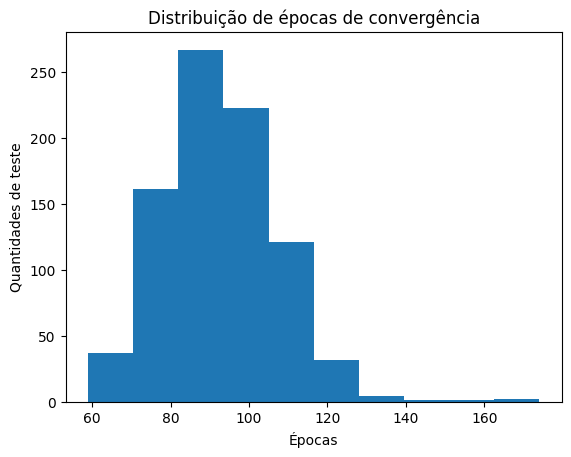

In [7]:
import matplotlib.pyplot as plt
plt.title("Distribuição de épocas de convergência")
plt.xlabel("Épocas")
plt.ylabel("Quantidades de teste")
plt.hist(quant_epocas)

A partir do histograma, é possível concluir que a maior parte dos testes convergiram antes das 100 gerações, estando a distribuição centrada próxima a 90. Isso pode sinalizar que o algoritmo está bem otimizado e é capaz de encontrar, na majoritária parcela dos testes, a solução para o problema da senha em poucas gerações (considerando a complexidade do espaço de busca).

## ☺️ **Conclusão** 

<p style="text-align:justify";>
Em resumo, as modificações realizadas nas funções de criação da população e de avaliação do fitness mostraram-se eficazes para a resolução do problema da senha variável. Dos 1000 testes realizados, apenas 15% não convergiram dentro do limite de gerações estabelecido, indicando um bom desempenho do algoritmo mesmo diante da maior complexidade imposta pela variação do comprimento das senhas.
</p>

<p style="text-align:justify";>
Como principal contribuição criativa, destaca-se a implementação da função de mutação por deleção ou inserção, inspirada em processos biológicos homônimos. Essa função permite a remoção ou introdução de genes, proporcionando ao algoritmo maior flexibilidade para explorar soluções com diferentes comprimentos, o que é essencial para esse tipo de problema.
</p>

<p style="text-align:justify";>
Por fim, a análise das distribuições dos resultados evidenciou a natureza probabilística dos algoritmos genéticos. Embora geralmente consigam encontrar soluções próximas da ótima, esses algoritmos não garantem a convergência para a melhor solução em todos os casos, especialmente quando sujeitos a espaços de busca grandes ou com múltiplos ótimos locais. Ainda assim, os bons resultados obtidos comprovam a eficácia desses algoritmos para a resolução desse tipo de problema.
</p>

## 🗃️ **Referências!** 

[1] Genetic Algorithms. GeeksforGeeks. Disponível em: <https://www.geeksforgeeks.org/genetic-algorithms/>. Acesso em: 24 maio 2025.

[2] WIRSANSKY, Eyal. Hands-On Genetic Algorithms with Python: Applying genetic algorithms to solve real-world deep learning and artificial intelligence problems. [s.l.]: Packt Publishing Ltd, 2020.